In [0]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import pylab
from scipy import ndimage
from google.colab.patches import cv2_imshow
def conversion():
    image = cv2.imread('/content/drive/My Drive/input image.PNG')
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    cv2.imwrite('gray_image.png',gray_image)
    cv2_imshow(image)
    cv2_imshow(gray_image) 
    cv2.waitKey(0)                 
    cv2.destroyAllWindows()

In [0]:
def gaussian():
    image = cv2.imread('gray_image.png')
    cv2.getGaussianKernel(9,9)
    blur= cv2.GaussianBlur(image,(5,5),0)
    cv2.imwrite('blur.png',blur)
    cv2_imshow(blur)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [0]:
def segmentation():
    image = cv2.imread('blur.png')
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    cv2.imwrite('thresh_image.jpg',thresh)
    cv2_imshow(thresh)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    kernel = np.ones((3,3),np.uint8)
    opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 3)
    cv2_imshow(thresh)
    cv2.waitKey(0)                  
    cv2.destroyAllWindows()

    sure_bg = cv2.dilate(opening,kernel,iterations=3)
    cv2_imshow(sure_bg)
    cv2.waitKey(0)                   
    cv2.destroyAllWindows()
    print ("No. of pests in the image: ")
    labelarray, particle_count = ndimage.measurements.label(sure_bg)
    print (particle_count)
    return particle_count

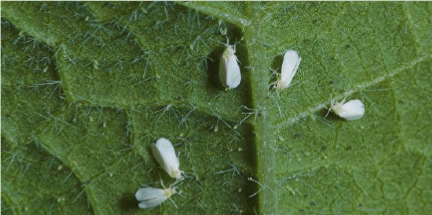

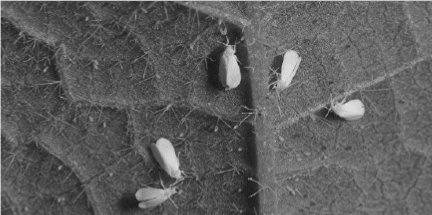

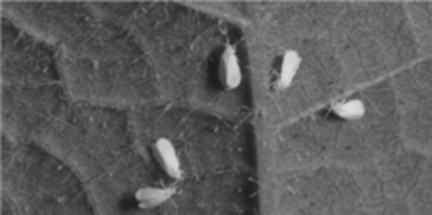

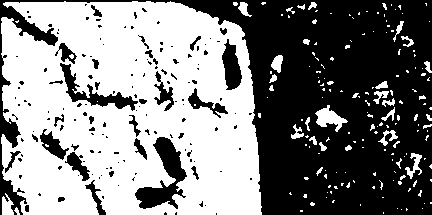

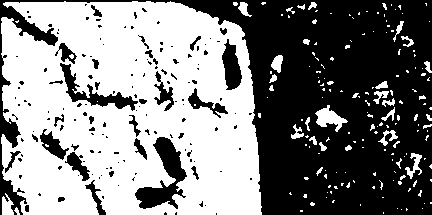

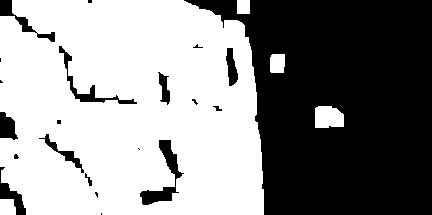

No. of pests in the image: 
5


In [0]:
conversion()
gaussian()
ans=segmentation()